<a href="https://www.kaggle.com/code/hongseoi/eda-on-fish-market?scriptVersionId=111767620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h1> EDA & ML on Fish Market🐟 </h1> </center> </div>


<center> <img src="https://cdn.pixabay.com/photo/2016/08/24/17/02/fish-1617442_960_720.jpg"></center>

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <h3><center> 0. About Dataset & goal of this notebook</center> </h3> </div>


Fish market dataset was created by SAS Ondemand for Academics, record 7 different fish species in fish market sales, and contains 7 features.

each features are about...

1. Species: Name of the species
2. Weight: Weight of the individual fish in grams
3. Length1: Vertical length in cm
4. Length2: Diagnoal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Width in cm


<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> Contents </h3> </center> </div>

0. About dataset & Goal of this notebook
1. Import necessary Libraries
2. Data preprocessing
3. EDA


<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 1. Import necessary Libraries </h3> </center> </div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [2]:
df = pd.read_csv("../input/fish-market/Fish.csv")
print(df.head())
print(df.shape)

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
(159, 7)


In [3]:
df = df.rename(columns = {"Species":"target"})

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 2. Data preprocessing </h3> </center> </div>

I belive that this dataset must be well defined, but checking dataset a time to certain it.

<h3>Checking missing values</h3>

In [4]:
df.isnull().sum().sort_values()

target     0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no missing value😀

<h3>Checking outlier</h3>

In [5]:
col_list = list(df.columns)
col_list.remove('target')
col_list

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

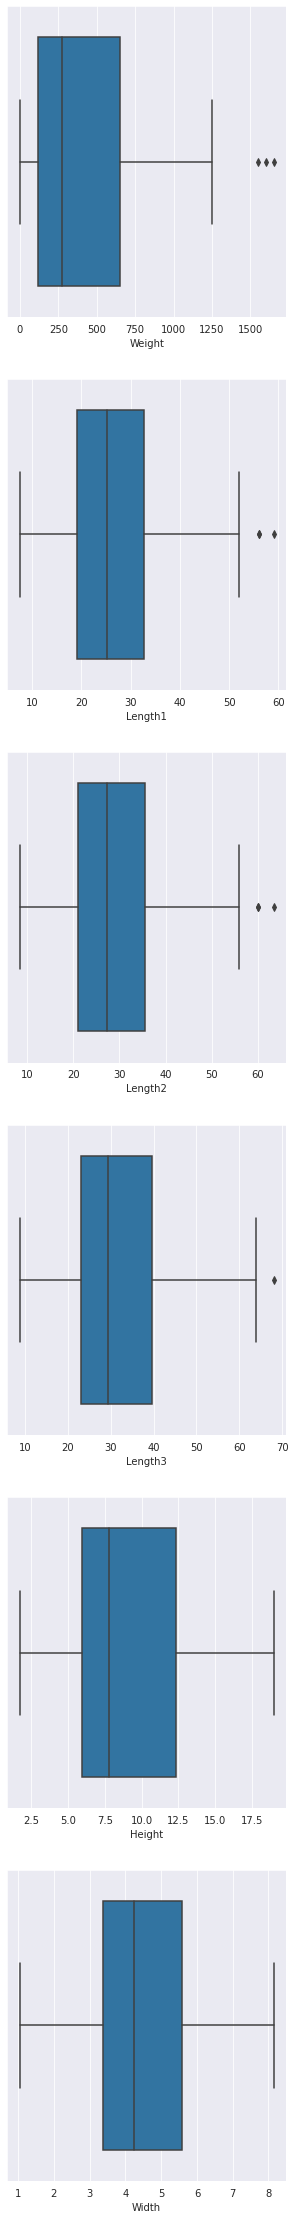

In [6]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=6, figsize=(5,40))

for i,c in enumerate(col_list):
    sns.boxplot(x=c, data=df, ax=ax[int(i)])
    

There are some overliers in Roach, Smelt.

In [7]:
#delete outlier
'''
df_outlier = df[(abs(df[col_list]-np.mean(df[col_list]))/np.std(df[col_list])<=3)].reset_index()
df_outlier['target'] = df['target']
df = df_outlier.drop(['index'], axis=1)
df.head()
'''

#I don't know the reason but when I used this code to delete outliers, it caused more outliers

# @wonduk gave me some advice!
## Delete outlier using |Q1-Q2|
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("delete outlier success")
#df = df.query('~(%s<@)')
#df = df[~((df[col] < (feature_value_less_than_3sigma)) |(df[col] > (feature_value_greater_than_3sigma)))]
#df = df.query('~(%s < @feature_value_less_than_3sigma or %s > @feature_value_greater_than_3sigma)' %(col,col))


delete outlier success


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


<h2>Feature scaling</h2>

<h3>Standaridization</h3>

In [8]:
df_std = (df[col_list]-df[col_list].mean())/df[col_list].std()
df_std.head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.416894,-0.269284,-0.243707,-0.053402,0.594052,-0.212727
1,-0.266682,-0.181561,-0.151801,0.058796,0.816051,-0.041933
2,-0.110210,-0.192526,-0.131378,0.049446,0.792418,0.191594
3,-0.038233,0.070642,0.123916,0.273843,0.873864,0.047710
4,0.171439,0.092573,0.123916,0.320592,0.807726,0.453466


<h3>Min-Max scaling</h3>

In [9]:
df_std[col_list] = (df_std[col_list]-df_std[col_list].min())/(df_std[col_list].max()-df_std[col_list].min())
df_std.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.1936,0.352809,0.357143,0.416503,0.568334,0.418978
1,0.2320,0.370787,0.376050,0.440079,0.624055,0.459235
2,0.2720,0.368539,0.380252,0.438114,0.618123,0.514279
3,0.2904,0.422472,0.432773,0.485265,0.638566,0.480365
4,0.3440,0.426966,0.432773,0.495088,0.621966,0.576004


In [10]:
df_std.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.300174,0.407995,0.407280,0.427724,0.419229,0.469119
std,0.255638,0.204935,0.205728,0.210125,0.250997,0.235705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.096000,0.258427,0.264706,0.279470,0.243971,0.327300
50%,0.216800,0.393258,0.385504,0.401768,0.343580,0.450454
75%,0.490000,0.553371,0.558824,0.601670,0.618167,0.616934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df_std['target'] = df['target']
df = df_std
df.head()

,Weight,Length1,Length2,Length3,Height,Width,target
0,0.1936,0.352809,0.357143,0.416503,0.568334,0.418978,Bream
1,0.2320,0.370787,0.376050,0.440079,0.624055,0.459235,Bream
2,0.2720,0.368539,0.380252,0.438114,0.618123,0.514279,Bream
3,0.2904,0.422472,0.432773,0.485265,0.638566,0.480365,Bream
4,0.3440,0.426966,0.432773,0.495088,0.621966,0.576004,Bream


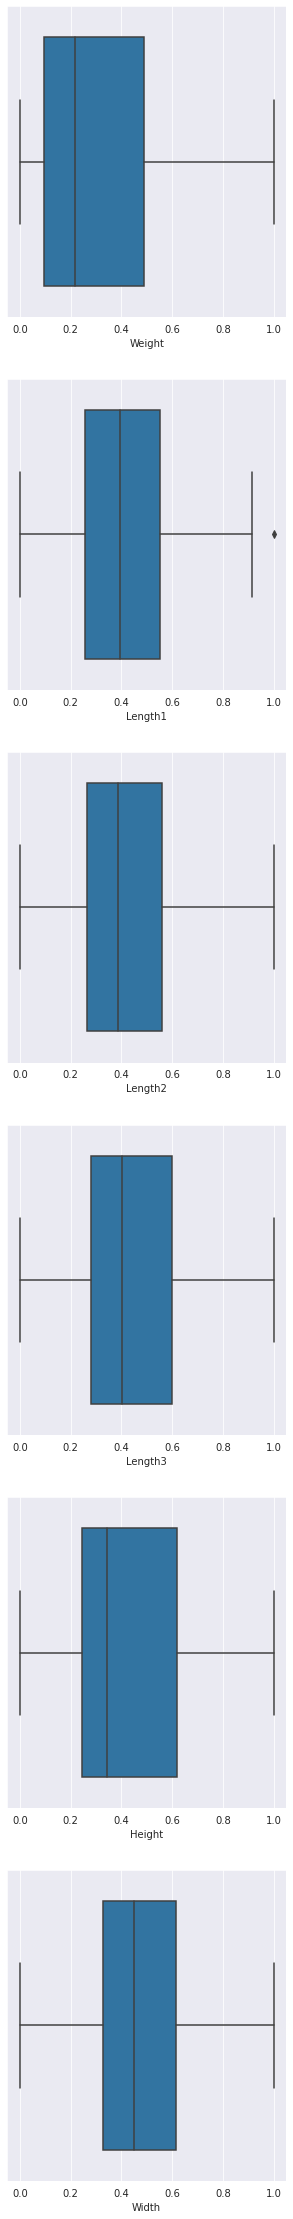

In [12]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=6, figsize=(5,40))

for i,c in enumerate(col_list):
    sns.boxplot(x=c, data=df, ax=ax[int(i)])
    
    

<div style="text-align: left; background-color: #2D70B7; color: white; padding: 5px; line-height: 1; border-radius:10px"> <center> <h3> 3. EDA </h3> </center> </div>


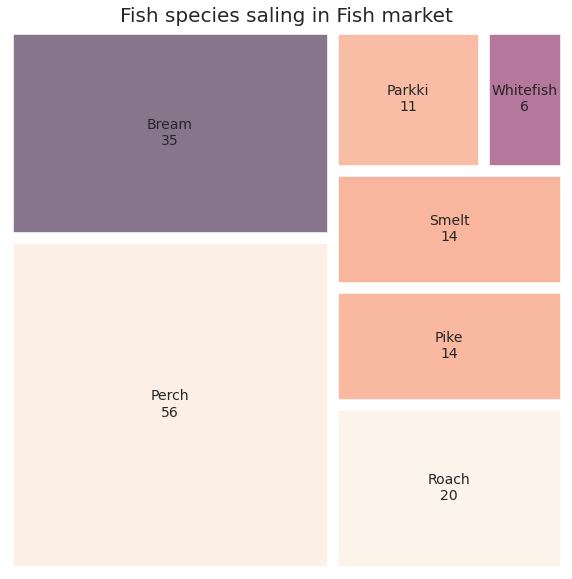

Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: target, dtype: int64

In [13]:
df_species = df['target'].value_counts()
df_species.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(1, figsize=(10,10))
squarify.plot(sizes=df_species.values, 
              label=[df_species.index[i]+'\n'+str(df_species.values[i]) for i in range(len(df_species))],
              #color= ,
              text_kwargs={'fontsize':14},
              pad = True,
              alpha=0.6)
plt.title("Fish species saling in Fish market", fontsize=20)
plt.axis('off')
plt.show()
df_species

In [14]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,target
0,0.1936,0.352809,0.357143,0.416503,0.568334,0.418978,Bream
1,0.2320,0.370787,0.376050,0.440079,0.624055,0.459235,Bream
2,0.2720,0.368539,0.380252,0.438114,0.618123,0.514279,Bream
3,0.2904,0.422472,0.432773,0.485265,0.638566,0.480365,Bream
4,0.3440,0.426966,0.432773,0.495088,0.621966,0.576004,Bream


Change feature name "Species" as "target"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   156 non-null    float64
 1   Length1  156 non-null    float64
 2   Length2  156 non-null    float64
 3   Length3  156 non-null    float64
 4   Height   156 non-null    float64
 5   Width    156 non-null    float64
 6   target   156 non-null    object 
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


What kinds of fish in the market?
Perch        56
Bream        35
Roach        20
Pike         14
Smelt        14
Parkki       11
Whitefish     6
Name: target, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


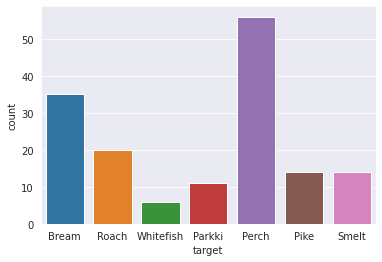

In [16]:
sns.countplot(df['target'])
print("What kinds of fish in the market?")
print(df.target.value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


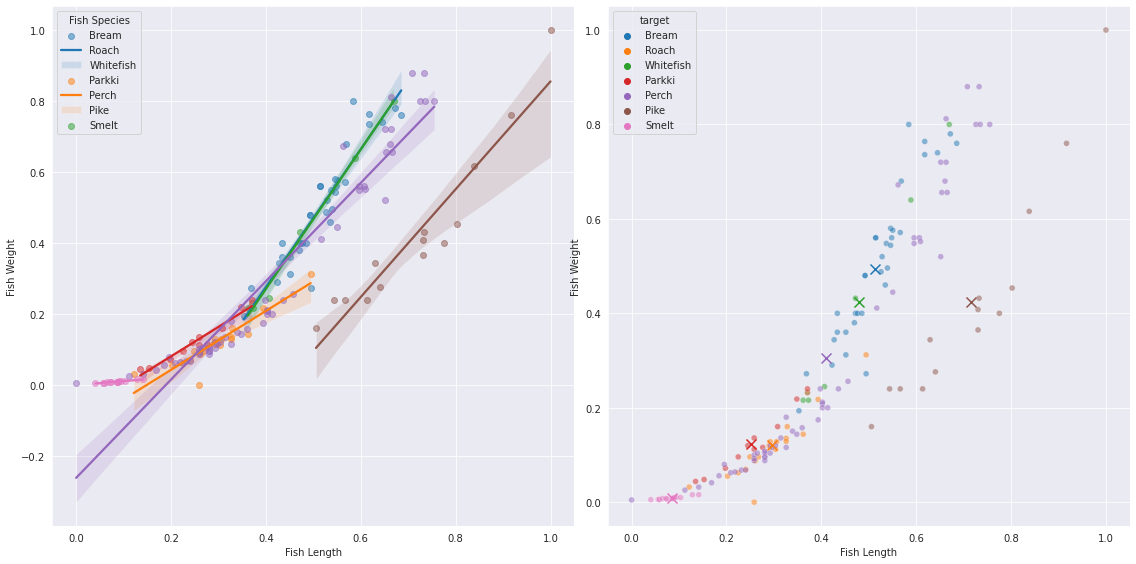

In [17]:
#using seaborn and matplot library draw plot

fig, axes = plt.subplots(ncols=2, figsize=(16,8))
species_fish = df['target'].unique()

# 1. plot with matplotlib
for i, s in enumerate(species_fish):
    axes[0].scatter(df['Length1'].loc[df['target']==s],
                   df['Weight'].loc[df['target']==s],
                   c=f'C{i}', label=s, alpha=0.5)
    
    #Add line using seaborn on the matplotlib
    sns.regplot('Length1','Weight', data=df.loc[df['target']==s],scatter=False, ax=axes[0])
    
axes[0].legend(species_fish, title='Fish Species')
axes[0].set_xlabel('Fish Length')
axes[0].set_ylabel('Fish Weight')

fig.tight_layout()

# 2. plot using seaborn
sns.scatterplot('Length1','Weight', hue='target',data=df, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Fish Length')
axes[1].set_ylabel('Fish Weight')

for i,s in enumerate(species_fish):
    #Add line using seaborn on the matplotlib
    axes[1].scatter(df['Length1'].loc[df['target']==s].mean(),
                   df['Weight'].loc[df['target']==s].mean(),
                   c=f'C{i}', alpha=1, marker='x', s=100)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

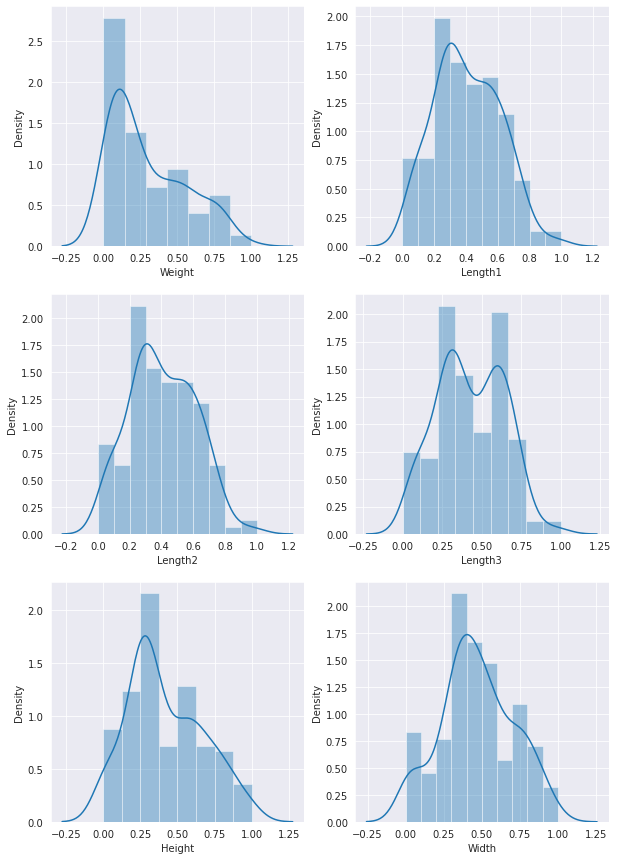

In [18]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

for i,c in enumerate(col_list):
    sns.distplot(df[c], ax=ax[int(i/2),int(i%2)])
    

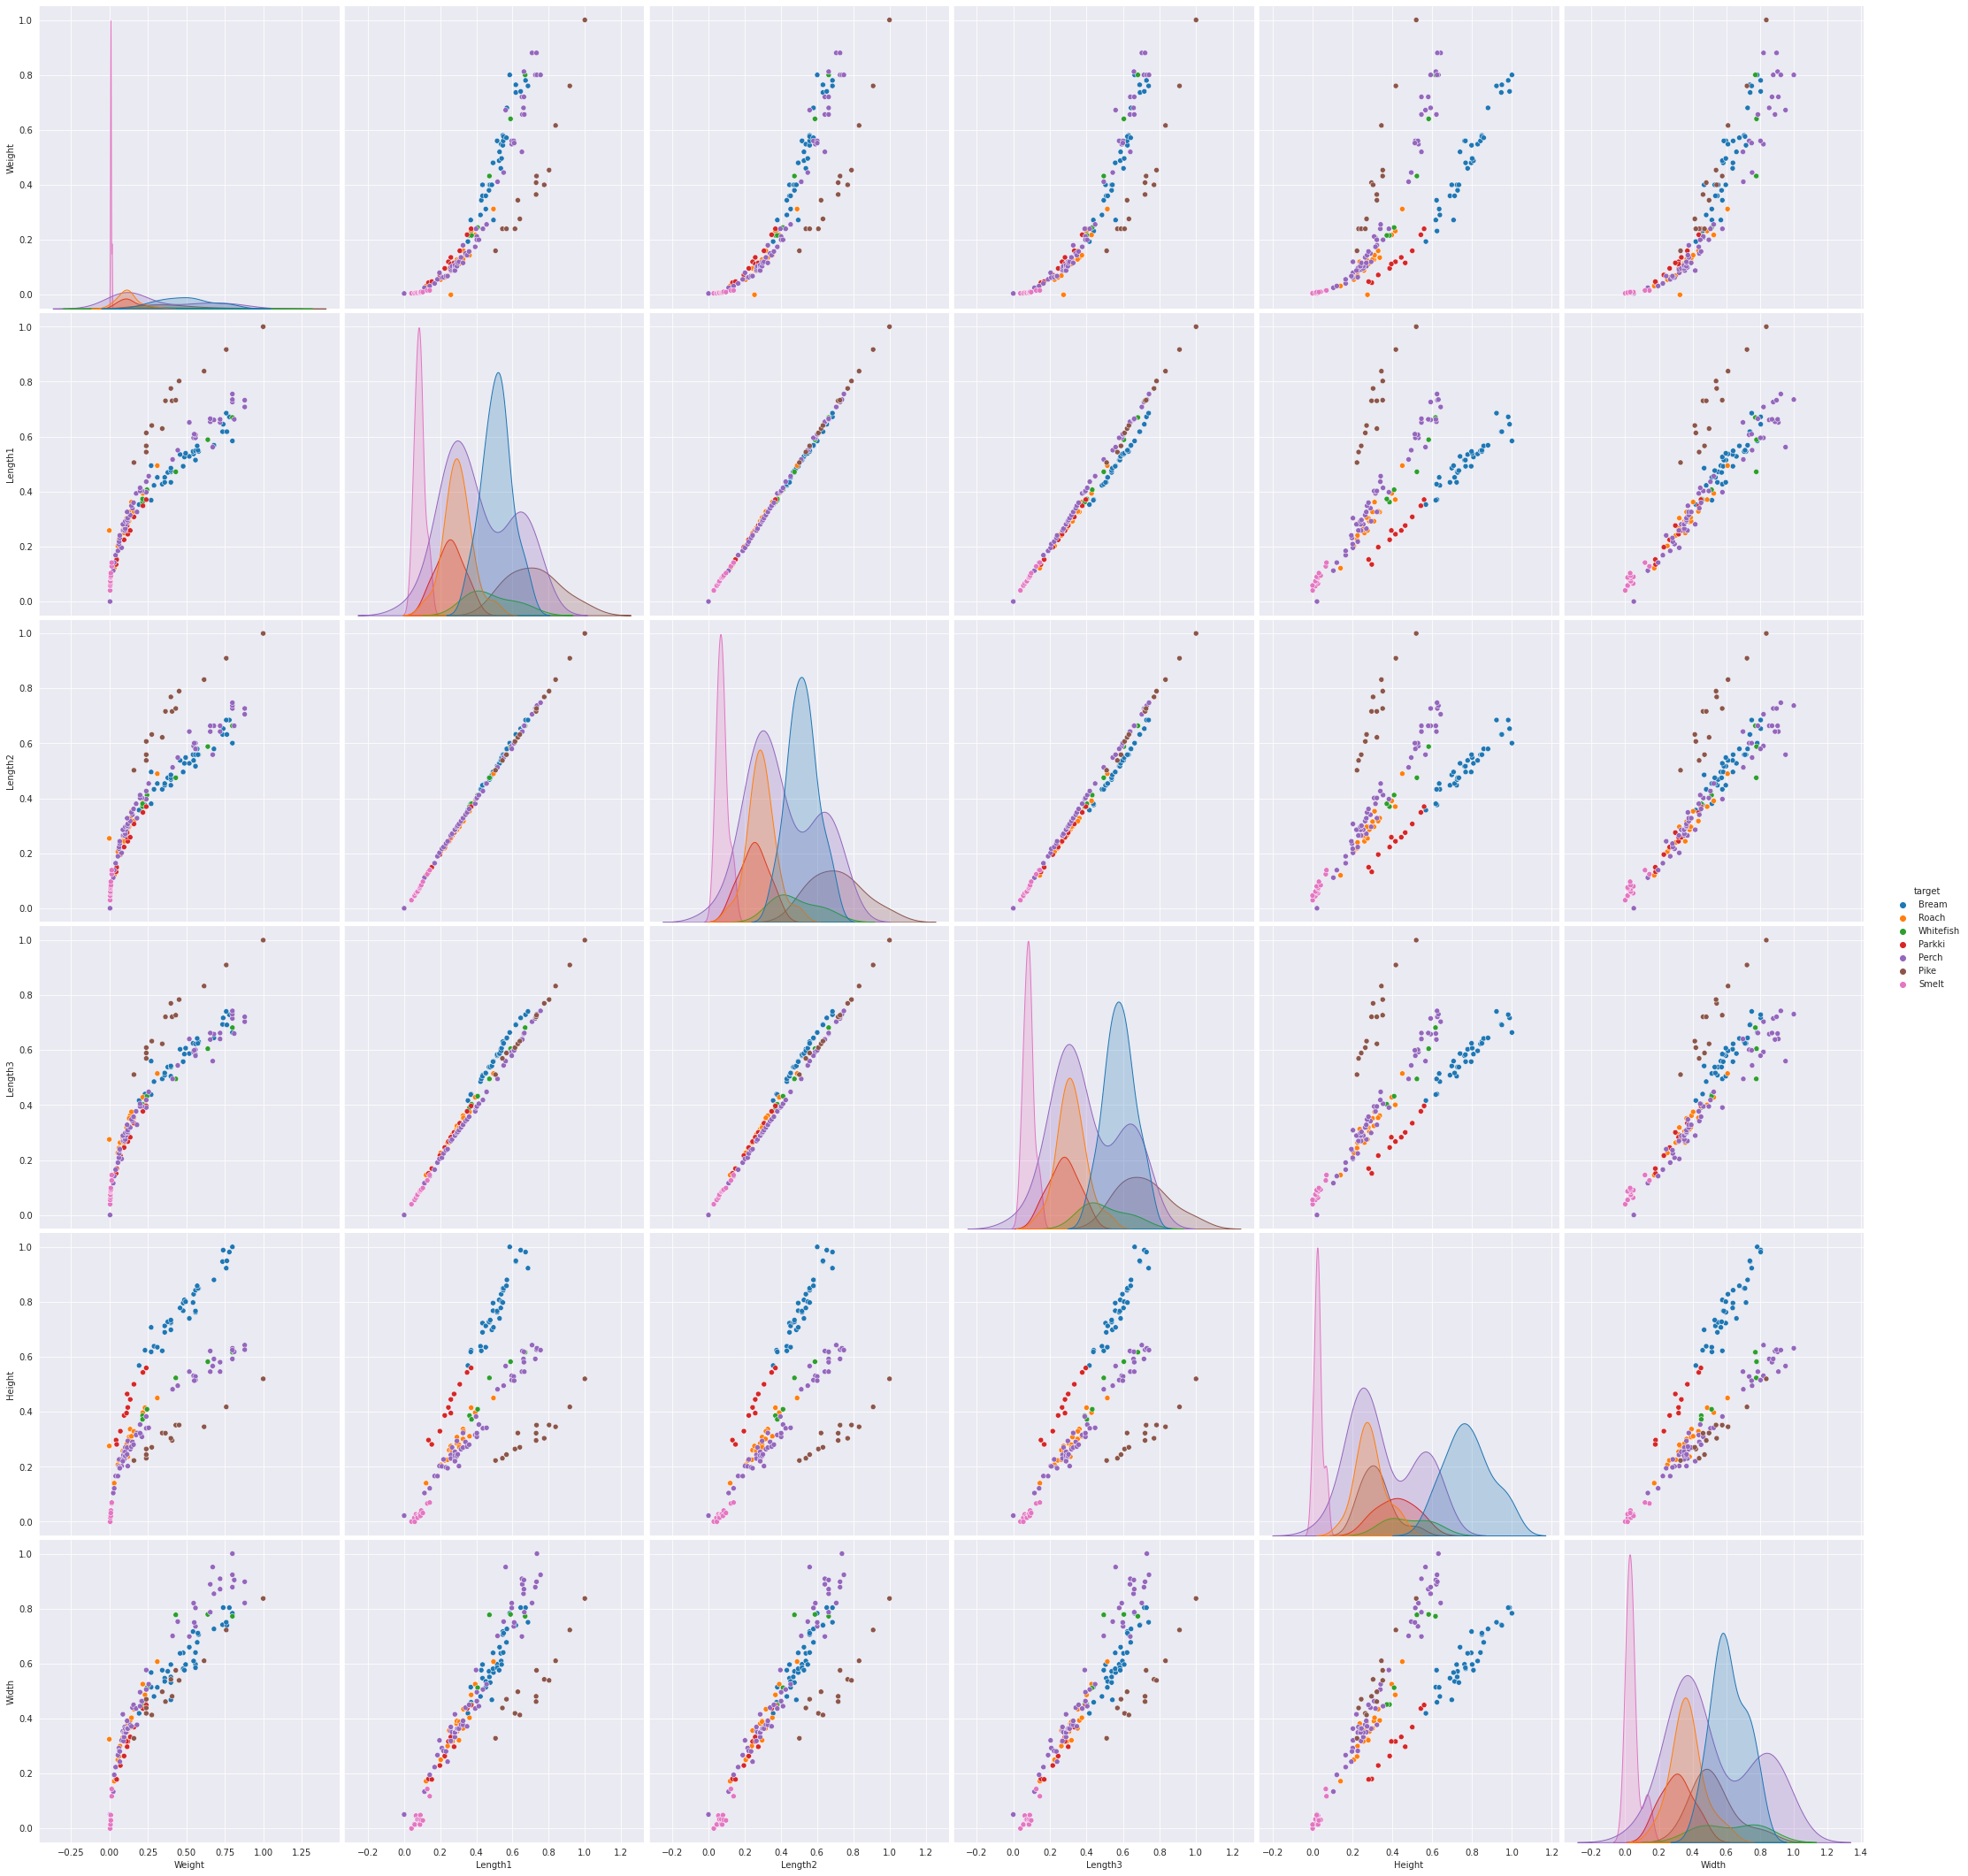

In [19]:
sns.pairplot(df, hue='target', height=5)

<AxesSubplot:>

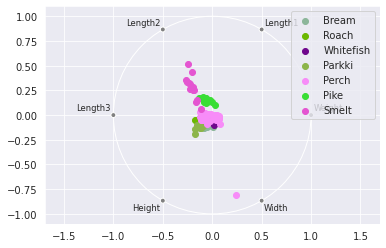

In [20]:
import pandas.plotting as pdplt
pdplt.radviz(df, 'target')

<AxesSubplot:>

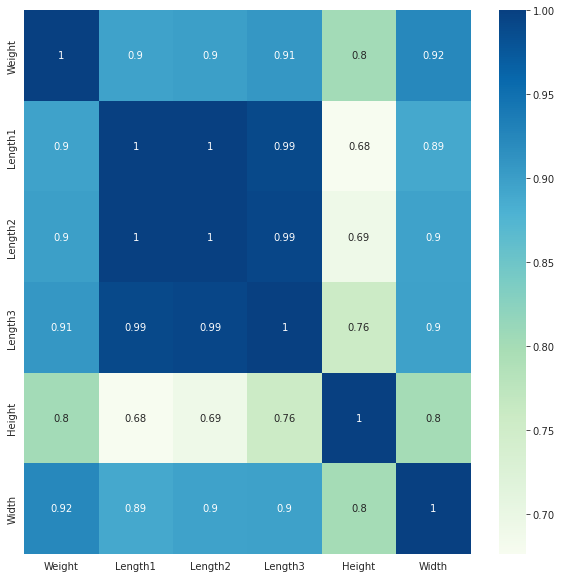

In [21]:
plt.figure(figsize=(10,10))
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot = True)

<pre>
Thx for watching!
I will appreciate if you give me a feedback🥰
</pre>
